In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_table('log.txt',header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8
0,162542,/front-api/bill/create,8,1057.31,88.75,177.72,132.0,60,2017-11-01 00:00:07
1,162644,/front-api/bill/create,5,749.12,103.79,240.38,149.0,60,2017-11-01 00:01:07
2,162742,/front-api/bill/create,5,845.84,136.31,225.73,169.0,60,2017-11-01 00:02:07
3,162808,/front-api/bill/create,9,1305.52,90.12,196.61,145.0,60,2017-11-01 00:03:07
4,162943,/front-api/bill/create,3,568.89,138.45,232.02,189.0,60,2017-11-01 00:04:07


In [4]:
df.tail()

,0,1,2,3,4,5,6,7,8
179491,13438800,/front-api/bill/create,11,2783.48,99.24,489.90,253.0,60,2018-05-30 23:06:21
179492,13438866,/front-api/bill/create,10,1951.10,85.37,529.51,195.0,60,2018-05-30 23:07:21
179493,13438917,/front-api/bill/create,3,494.17,103.95,211.47,164.0,60,2018-05-30 23:08:21
179494,13438981,/front-api/bill/create,9,1798.28,101.11,433.30,199.0,60,2018-05-30 23:09:21
179495,13439086,/front-api/bill/create,6,1017.97,74.45,298.97,169.0,60,2018-05-30 23:10:21


In [5]:
df=pd.read_table('log.txt',names=['id','api','count','res_time_sum','res_time_min','res_time_max','res_time_avg','interval','created_at'])

In [6]:
df.head()

,id,api,count,res_time_sum,res_time_min,res_time_max,res_time_avg,interval,created_at
0,162542,/front-api/bill/create,8,1057.31,88.75,177.72,132.0,60,2017-11-01 00:00:07
1,162644,/front-api/bill/create,5,749.12,103.79,240.38,149.0,60,2017-11-01 00:01:07
2,162742,/front-api/bill/create,5,845.84,136.31,225.73,169.0,60,2017-11-01 00:02:07
3,162808,/front-api/bill/create,9,1305.52,90.12,196.61,145.0,60,2017-11-01 00:03:07
4,162943,/front-api/bill/create,3,568.89,138.45,232.02,189.0,60,2017-11-01 00:04:07


## 检测是否有重复值

In [7]:
df.duplicated().sum()

0

## 检测是否有异常值

In [8]:
df.isnull().sum()

id              0
api             0
count           0
res_time_sum    0
res_time_min    0
res_time_max    0
res_time_avg    0
interval        0
created_at      0
dtype: int64

In [9]:
df.describe()

,id,count,res_time_sum,res_time_min,res_time_max,res_time_avg,interval
count,1.794960e+05,179496.000000,179496.000000,179496.000000,179496.000000,179496.000000,179496.0
mean,6.866490e+06,7.175909,1393.177370,108.419620,359.880351,187.812208,60.0
std,3.686579e+06,4.325160,1499.485881,79.640559,638.919769,224.464813,0.0
min,1.625420e+05,1.000000,36.550000,3.210000,36.550000,36.000000,60.0
25%,3.825183e+06,4.000000,607.707500,83.410000,198.280000,144.000000,60.0
50%,6.811432e+06,7.000000,1154.905000,97.120000,256.090000,167.000000,60.0
75%,9.981397e+06,10.000000,1834.117500,116.990000,374.410000,202.000000,60.0
max,1.343909e+07,31.000000,142650.550000,18896.640000,142468.270000,71325.000000,60.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179496 entries, 0 to 179495
Data columns (total 9 columns):
id              179496 non-null int64
api             179496 non-null object
count           179496 non-null int64
res_time_sum    179496 non-null float64
res_time_min    179496 non-null float64
res_time_max    179496 non-null float64
res_time_avg    179496 non-null float64
interval        179496 non-null int64
created_at      179496 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 12.3+ MB


## 分析api和interval这两列的数据是否对分析有用

In [18]:
df.head()

,id,count,res_time_sum,res_time_min,res_time_max,res_time_avg,created_at
0,162542,8,1057.31,88.75,177.72,132.0,2017-11-01 00:00:07
1,162644,5,749.12,103.79,240.38,149.0,2017-11-01 00:01:07
2,162742,5,845.84,136.31,225.73,169.0,2017-11-01 00:02:07
3,162808,9,1305.52,90.12,196.61,145.0,2017-11-01 00:03:07
4,162943,3,568.89,138.45,232.02,189.0,2017-11-01 00:04:07


## api是访问请求路径，全部相同；interval是间隔时间都相同；两列都为重复相同数据，无参考价值

## 去除此2列

In [20]:
df = df.drop(columns=['api','interval'])

KeyError: "['api' 'interval'] not found in axis"

In [21]:
df.head()

,id,count,res_time_sum,res_time_min,res_time_max,res_time_avg,created_at
0,162542,8,1057.31,88.75,177.72,132.0,2017-11-01 00:00:07
1,162644,5,749.12,103.79,240.38,149.0,2017-11-01 00:01:07
2,162742,5,845.84,136.31,225.73,169.0,2017-11-01 00:02:07
3,162808,9,1305.52,90.12,196.61,145.0,2017-11-01 00:03:07
4,162943,3,568.89,138.45,232.02,189.0,2017-11-01 00:04:07


In [22]:
df.sample(5)

,id,count,res_time_sum,res_time_min,res_time_max,res_time_avg,created_at
102507,7597671,15,2994.22,113.94,416.98,199.0,2018-03-03 20:49:45
17435,1717392,8,1017.34,73.80,199.40,127.0,2017-11-21 12:42:48
93162,6987855,1,115.94,115.94,115.94,115.0,2018-02-20 11:42:28
43517,3733598,2,229.46,71.61,157.85,114.0,2017-12-21 19:10:40
26752,2553795,3,422.09,90.96,172.80,140.0,2017-12-02 01:05:09


In [23]:
df.shape

(179496, 7)

In [24]:
df.dtypes

id                int64
count             int64
res_time_sum    float64
res_time_min    float64
res_time_max    float64
res_time_avg    float64
created_at       object
dtype: object

In [25]:
df.describe()

,id,count,res_time_sum,res_time_min,res_time_max,res_time_avg
count,1.794960e+05,179496.000000,179496.000000,179496.000000,179496.000000,179496.000000
mean,6.866490e+06,7.175909,1393.177370,108.419620,359.880351,187.812208
std,3.686579e+06,4.325160,1499.485881,79.640559,638.919769,224.464813
min,1.625420e+05,1.000000,36.550000,3.210000,36.550000,36.000000
25%,3.825183e+06,4.000000,607.707500,83.410000,198.280000,144.000000
50%,6.811432e+06,7.000000,1154.905000,97.120000,256.090000,167.000000
75%,9.981397e+06,10.000000,1834.117500,116.990000,374.410000,202.000000
max,1.343909e+07,31.000000,142650.550000,18896.640000,142468.270000,71325.000000


In [29]:
df.index

RangeIndex(start=0, stop=179496, step=1)

In [30]:
df.index = pd.to_datetime(df['created_at'])

In [31]:
df.index

DatetimeIndex(['2017-11-01 00:00:07', '2017-11-01 00:01:07',
               '2017-11-01 00:02:07', '2017-11-01 00:03:07',
               '2017-11-01 00:04:07', '2017-11-01 00:05:07',
               '2017-11-01 00:06:07', '2017-11-01 00:07:07',
               '2017-11-01 00:08:07', '2017-11-01 00:09:07',
               ...
               '2018-05-30 23:01:21', '2018-05-30 23:02:21',
               '2018-05-30 23:03:21', '2018-05-30 23:04:21',
               '2018-05-30 23:05:21', '2018-05-30 23:06:21',
               '2018-05-30 23:07:21', '2018-05-30 23:08:21',
               '2018-05-30 23:09:21', '2018-05-30 23:10:21'],
              dtype='datetime64[ns]', name='created_at', length=179496, freq=None)

In [32]:
df['2018-05-01']

,id,count,res_time_sum,res_time_min,res_time_max,res_time_avg,created_at
created_at,,,,,,,
2018-05-01 00:00:48,11406128,6,2105.08,125.74,992.46,350.0,2018-05-01 00:00:48
2018-05-01 00:01:48,11406236,7,2579.11,76.55,987.47,368.0,2018-05-01 00:01:48
2018-05-01 00:02:48,11406347,7,1277.79,109.65,236.73,182.0,2018-05-01 00:02:48
2018-05-01 00:03:48,11406446,7,2137.20,131.55,920.52,305.0,2018-05-01 00:03:48
2018-05-01 00:04:48,11406488,13,2948.70,86.42,491.31,226.0,2018-05-01 00:04:48
2018-05-01 00:05:48,11406599,6,2463.78,137.75,1445.82,410.0,2018-05-01 00:05:48
2018-05-01 00:06:48,11406661,6,2875.67,166.32,1304.41,479.0,2018-05-01 00:06:48
2018-05-01 00:07:48,11406751,8,1764.17,93.63,425.96,220.0,2018-05-01 00:07:48
2018-05-01 00:08:48,11406812,8,2577.12,148.68,864.03,322.0,2018-05-01 00:08:48


In [35]:
df = df.drop('id',axis=1)

In [36]:
df.head()

,count,res_time_sum,res_time_min,res_time_max,res_time_avg,created_at
created_at,,,,,,
2017-11-01 00:00:07,8,1057.31,88.75,177.72,132.0,2017-11-01 00:00:07
2017-11-01 00:01:07,5,749.12,103.79,240.38,149.0,2017-11-01 00:01:07
2017-11-01 00:02:07,5,845.84,136.31,225.73,169.0,2017-11-01 00:02:07
2017-11-01 00:03:07,9,1305.52,90.12,196.61,145.0,2017-11-01 00:03:07
2017-11-01 00:04:07,3,568.89,138.45,232.02,189.0,2017-11-01 00:04:07


In [39]:
df.describe()

,count,res_time_sum,res_time_min,res_time_max,res_time_avg
count,179496.000000,179496.000000,179496.000000,179496.000000,179496.000000
mean,7.175909,1393.177370,108.419620,359.880351,187.812208
std,4.325160,1499.485881,79.640559,638.919769,224.464813
min,1.000000,36.550000,3.210000,36.550000,36.000000
25%,4.000000,607.707500,83.410000,198.280000,144.000000
50%,7.000000,1154.905000,97.120000,256.090000,167.000000
75%,10.000000,1834.117500,116.990000,374.410000,202.000000
max,31.000000,142650.550000,18896.640000,142468.270000,71325.000000


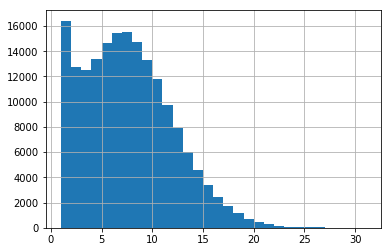

In [42]:
df['count'].hist(bins=30)
plt.show()

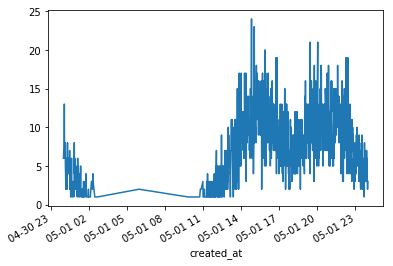

In [44]:
df['2018-05-01']['count'].plot()

plt.show()

In [53]:
df2 = df['2018-05-01']

In [54]:
df2 = df2[['count']].resample('1H').mean() #一个小时取一个均值

In [55]:
df2.head()

,count
created_at,
2018-05-01 00:00:00,4.428571
2018-05-01 01:00:00,2.272727
2018-05-01 02:00:00,1.833333
2018-05-01 03:00:00,NaN
2018-05-01 04:00:00,NaN


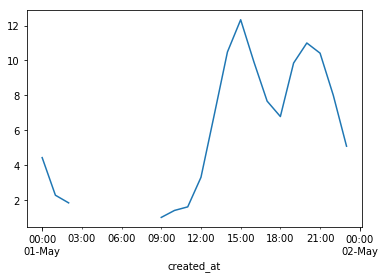

In [57]:
df2['count'].plot()
plt.show()

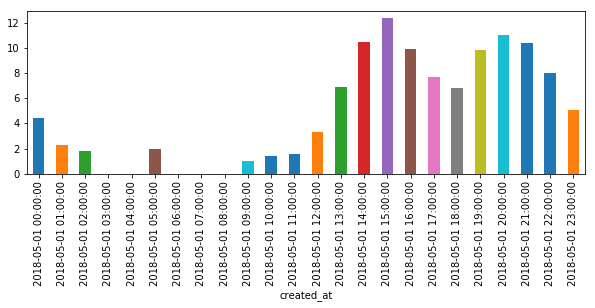

In [59]:
plt.figure(figsize=(10,3))
df2['count'].plot(kind='bar')
plt.show()

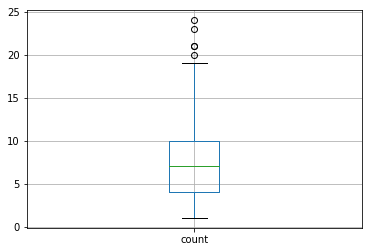

In [61]:
df['2018-05-01'][['count']].boxplot()
plt.show()

In [62]:
df[df['count']>20]

,count,res_time_sum,res_time_min,res_time_max,res_time_avg,created_at
created_at,,,,,,
2017-11-01 20:47:09,21,3117.20,84.90,260.82,148.0,2017-11-01 20:47:09
2017-11-01 21:03:09,21,3706.20,78.12,321.47,176.0,2017-11-01 21:03:09
2017-11-01 21:13:09,24,4602.03,76.31,391.12,191.0,2017-11-01 21:13:09
2017-11-02 21:34:11,30,4610.15,72.49,463.41,153.0,2017-11-02 21:34:11
2017-11-03 14:20:13,21,3113.93,74.29,266.20,148.0,2017-11-03 14:20:13
2017-11-03 20:16:13,21,2992.24,86.28,246.71,142.0,2017-11-03 20:16:13
2017-11-03 22:01:13,22,3615.11,108.00,231.49,164.0,2017-11-03 22:01:13
2017-11-03 22:42:13,28,4332.65,76.26,263.33,154.0,2017-11-03 22:42:13
2017-11-05 15:49:17,24,3723.64,88.97,280.92,155.0,2017-11-05 15:49:17


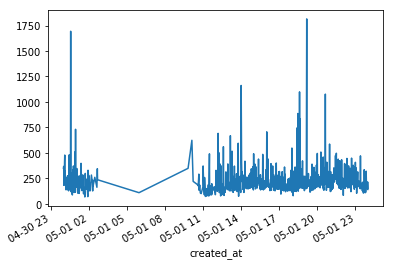

In [64]:
df['2018-05-01']['res_time_avg'].plot()

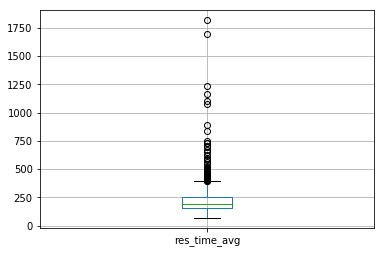

In [66]:
df['2018-05-01'][['res_time_avg']].boxplot()
plt.show()

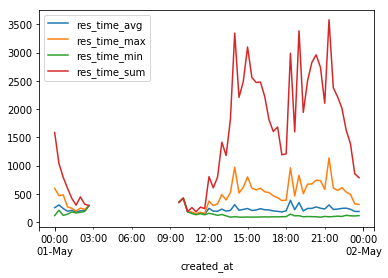

In [71]:
df['2018-05-01'].resample('20T').mean()[['res_time_avg','res_time_max','res_time_min','res_time_sum']].plot()
plt.show()

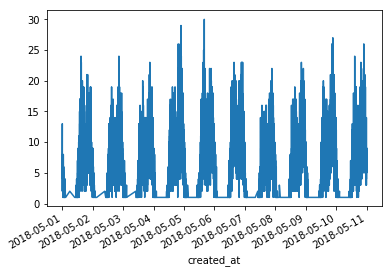

In [74]:
df['2018-5-1':'2018-5-10']['count'].plot()
plt.show()

In [75]:
df['2018-5-1'].index.weekday

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', name='created_at', length=884)

In [76]:
df['weekday'] = df.index.weekday

In [78]:
df.tail()

,count,res_time_sum,res_time_min,res_time_max,res_time_avg,created_at,weekday
created_at,,,,,,,
2018-05-30 23:06:21,11,2783.48,99.24,489.90,253.0,2018-05-30 23:06:21,2
2018-05-30 23:07:21,10,1951.10,85.37,529.51,195.0,2018-05-30 23:07:21,2
2018-05-30 23:08:21,3,494.17,103.95,211.47,164.0,2018-05-30 23:08:21,2
2018-05-30 23:09:21,9,1798.28,101.11,433.30,199.0,2018-05-30 23:09:21,2
2018-05-30 23:10:21,6,1017.97,74.45,298.97,169.0,2018-05-30 23:10:21,2


In [81]:
df['weekend'] = df['weekday'].isin({5,6})

In [82]:
df.head()

,count,res_time_sum,res_time_min,res_time_max,res_time_avg,created_at,weekday,weekend
created_at,,,,,,,,
2017-11-01 00:00:07,8,1057.31,88.75,177.72,132.0,2017-11-01 00:00:07,2,False
2017-11-01 00:01:07,5,749.12,103.79,240.38,149.0,2017-11-01 00:01:07,2,False
2017-11-01 00:02:07,5,845.84,136.31,225.73,169.0,2017-11-01 00:02:07,2,False
2017-11-01 00:03:07,9,1305.52,90.12,196.61,145.0,2017-11-01 00:03:07,2,False
2017-11-01 00:04:07,3,568.89,138.45,232.02,189.0,2017-11-01 00:04:07,2,False


In [87]:
df.groupby(['weekend',df.index.hour])['count'].mean()

weekend  created_at
False    0              3.128067
         1              1.630455
         2              1.169133
         3              1.077844
         4              1.177778
         5              1.157895
         6              1.000000
         7              1.000000
         8              1.000000
         9              1.130081
         10             1.239251
         11             2.063804
         12             4.371090
         13             6.486743
         14             7.871789
         15             8.456582
         16             7.997661
         17             6.407690
         18             6.563842
         19             8.571731
         20            10.495051
         21            10.963392
         22             9.378861
         23             6.250367
True     0              3.734308
         1              1.817551
         2              1.149606
         3              1.075758
         4              1.000000
         5             

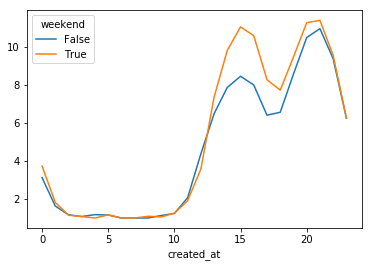

In [89]:
df.groupby(['weekend',df.index.hour])['count'].mean().unstack(level=0).plot()